In [1]:
import pandas as pd

df = pd.read_csv('imputed_dataset.csv')

df.head()

,rating,ranking,year,position,height,weight,latitude,longitude,state_province,stars,committed_to,is_drafted,conference,latitude_school,longitude_school,distance_miles,side_of_ball,position_group
0,0.9997,1.0,2008,SDE,76.0,265.0,33.297101,-81.034820,SC,5,Clemson,1.0,ACC,34.678774,-82.843243,140.875603,defense,d_line
1,0.9784,41.0,2008,RB,72.0,235.0,30.332184,-81.655651,FL,4,Clemson,1.0,ACC,34.678774,-82.843243,308.184880,offense,running_back
2,0.9713,61.0,2008,DT,74.0,290.0,30.836582,-83.978781,GA,4,Clemson,1.0,ACC,34.678774,-82.843243,273.542763,defense,d_line
3,0.9622,82.0,2008,OT,78.0,315.0,33.695381,-85.839842,AL,4,Clemson,0.0,ACC,34.678774,-82.843243,184.246286,offense,o_line
4,0.9473,106.0,2008,S,74.0,180.0,35.117087,-80.723718,NC,4,Clemson,0.0,ACC,34.678774,-82.843243,123.867830,defense,d_backfield


In [2]:
conference_group = {'SEC': 'power_5', 'Big Ten': 'power_5', 'ACC': 'power_5', 'Big 12': 'power_5'
                  , 'FBS Independents': 'ind', 'Mountain West': 'group_5'
                  , 'Pac-12': 'power_5', 'Mid-American': 'group_5', 'American Athletic': 'group_5'
                  , 'Sun Belt': 'group_5', 'Conference USA': 'group_5'}

df["conf_group"] = df["conference"].map(conference_group)

In [10]:
quant_cols = ['rating', 'ranking', 'height', 'weight', 'distance_miles']

In [11]:
df.columns

Index(['rating', 'ranking', 'year', 'position', 'height', 'weight', 'latitude',
       'longitude', 'state_province', 'stars', 'committed_to', 'is_drafted',
       'conference', 'latitude_school', 'longitude_school', 'distance_miles',
       'side_of_ball', 'position_group', 'conf_group'],
      dtype='object')

In [12]:
df_quant = df[quant_cols]
df_quant.head()

,rating,ranking,height,weight,distance_miles
0,0.9997,1.0,76.0,265.0,140.875603
1,0.9784,41.0,72.0,235.0,308.184880
2,0.9713,61.0,74.0,290.0,273.542763
3,0.9622,82.0,78.0,315.0,184.246286
4,0.9473,106.0,74.0,180.0,123.867830


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    
# Standardize the selected columns
df_quant_scaled = scaler.fit_transform(df_quant)

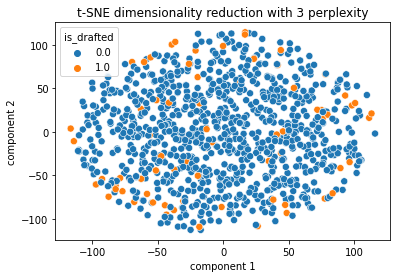

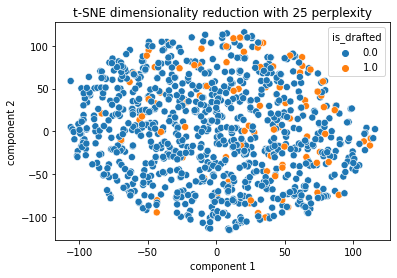

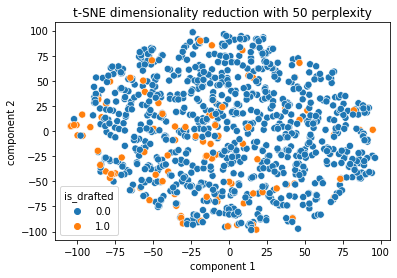

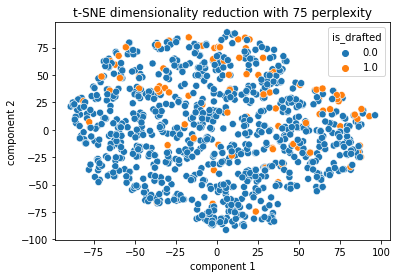

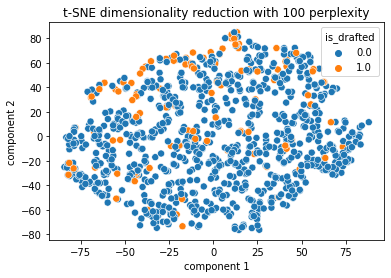

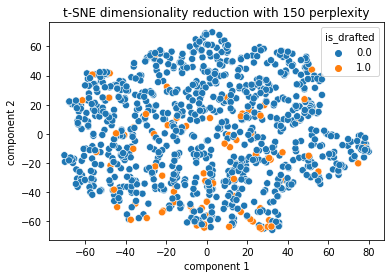

In [14]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

perplexity = [3, 25, 50, 75, 100, 150]

for p in perplexity:

    # t-SNE dim reduction
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='random', perplexity=p).fit_transform(df_quant_scaled)
    
    # Plot
    color = 'is_drafted'
    
    X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
    X_emb_df[color] = df[color]
    
    X_plot = X_emb_df.sample(1000)
    
    sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
        
    # Add labels and title
    plt.title("t-SNE dimensionality reduction with " + str(p) + " perplexity")
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    # Show the plot
    plt.show()


In [ ]:
# p = 100
# t-SNE dim reduction
# X_embedded = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=p).fit_transform(df_quant_scaled)

In [ ]:
df.columns

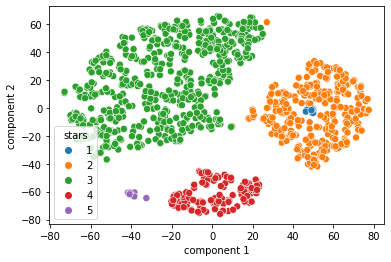

In [9]:
# Plot
color = 'stars'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
# plt.title(f'Scatter Plot of {y_col} vs {x_col} Colored by {color_col}')
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

In [ ]:
# Plot
color = 'conf_group'

X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

plot_data = X_emb_df.sample(2000)

alt.Chart(plot_data).mark_circle().encode(
    x = 'component 1'
  , y = 'component 2'
  , color = color + ":N", opacity = alt.value(1)).properties(
    height = 300, width = 400)

In [ ]:
df.columns

In [ ]:
X_plot = X_emb_df.sample(1000)

sns.scatterplot(x=X_plot['component 1'], y=X_plot['component 2'], hue=X_plot[color], palette='tab10', s=50)
    
# Add labels and title
# plt.title(f'Scatter Plot of {y_col} vs {x_col} Colored by {color_col}')
plt.xlabel('component 1')
plt.ylabel('component 2')

# Show the plot
plt.show()

In [ ]:
df.columns

In [ ]:
charts = []
# for i in ['conference', 'position_group', 'position', 'is_drafted']:

color = 'position_group'
    
    
X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
X_emb_df[color] = df[color]

X_emb_df = X_emb_df.sample(1000)

alt.Chart(X_emb_df).mark_circle().encode(
    x = 'component 1', y = 'component 2', color = color
)



In [ ]:
import altair as alt

for i in ['conference', 'position_group', 'position', 'is_drafted']:

    color = i
    n_samples = 1000

    X_emb_df = pd.DataFrame(X_embedded, columns = ['component 1', 'component 2'])
    X_emb_df[color] = df[color]

    chart = alt.Chart(X_emb_df).mark_circle().encode(
        x = 'component 1', y = 'component 2'
        , color = i
    )  

    

    
        

In [ ]:
chart